# Introduction 

This is a copy of the  example given on the Deeptime documentation website [here](https://deeptime-ml.github.io/latest/notebooks/examples/ala2-example.html).  Run this example first before trying any of the experimental code to make sure everting is working as it should! 

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import mdshare  

from deeptime.util.data import TimeLaggedDataset
from tqdm.notebook import tqdm  # progress bar


In [5]:
assert torch.cuda.is_available(), "Need a GPU with CUDA" 
device = torch.device("cuda")
torch.backends.cudnn.benchmark = True

## Globals

In [14]:
data_dir = "/home/rob/online_vampnets/data"
lag_time = 1

In [15]:

ala_coords_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-heavy-atom-positions.npz", working_directory=data_dir
)
with np.load(ala_coords_file) as fh:
    data = [fh[f"arr_{i}"].astype(np.float32) for i in range(3)]

dihedral_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-backbone-dihedrals.npz", working_directory=data_dir
)
with np.load(dihedral_file) as fh:
    dihedral = [fh[f"arr_{i}"] for i in range(3)]



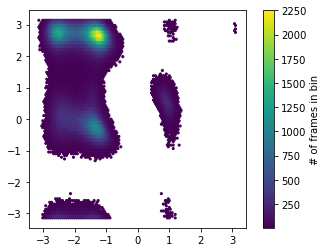

In [16]:
f, ax = plt.subplots(1, 1)
hb = ax.hexbin(*np.concatenate(dihedral).T, mincnt=5)
ax.set_aspect('equal')
cb = f.colorbar(hb, ax=ax)
cb.set_label('# of frames in bin')


In [21]:

dataset = TimeLaggedDataset.from_trajectories(lagtime=lag_time, data=data)

AttributeError: type object 'TimeLaggedDataset' has no attribute 'from_trajectories'